<a href="https://colab.research.google.com/github/OsvaldoUfla/MLPClassifier/blob/main/MLPClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementação MLPClassifier ##

Alunos:
* Leonardo Gonçalves Flora
* Osvaldo Rodrigues de Faria Júnior


## 1. Importação ##

Importamos as Bibliotecas necessárias e carregamos a Base de Dados Iris

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import time
import numpy as np
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.datasets import load_iris

# carregando a base de dados Iris
iris = load_iris()


## 2. Preparação dos Dados ##

 Armazenamos as features do conjunto de dados na variável X e os rótulos na variável y, para que pudéssemos usá-los posteriormente

In [ ]:
# Dividindo os dados em conjuntos de treinamento e teste
X = iris.data
y = iris.target

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.4, random_state=42)

## 3. Classificador ##

Utilizamos o MLP da biblioteca Sklearn e definimos os parâmetros, como o número de neurônios na camada oculta e o número máximo de iterações para o treinamento. Em seguida, treinamos o modelo com os dados de treinamento e fizemos previsões com o conjunto teste.

In [ ]:
# Criando o classificador MLP
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Treinando o classificador
mlp.fit(X_treino, y_treino)

# Fazendo previsões no conjunto de teste
y_pred = mlp.predict(X_teste)

## 4. Métricas de Avaliação ##

Após fazer previsões utilizando o modelo treinado sobre os dados de teste, calculamos diversas métricas de avaliação para entender o quão bem o modelo está performando.

In [ ]:
# Calculando a matriz de confusão
matriz_confusao = confusion_matrix(y_teste, y_pred)

# Calculando métricas de avaliação
acuracia = accuracy_score(y_teste, y_pred)
precisao = precision_score(y_teste, y_pred, average='weighted')
revocacao = recall_score(y_teste, y_pred, average='weighted')

## 5. Visualização dos resultados ##

Por fim, implementamos a visualização da matriz de confusão usando a biblioteca Seaborn. Depois, imprimimos as métricas de avaliação e outras informações relevantes, como o número de amostras de treinamento e teste, além das precisões e revocações para cada classe.

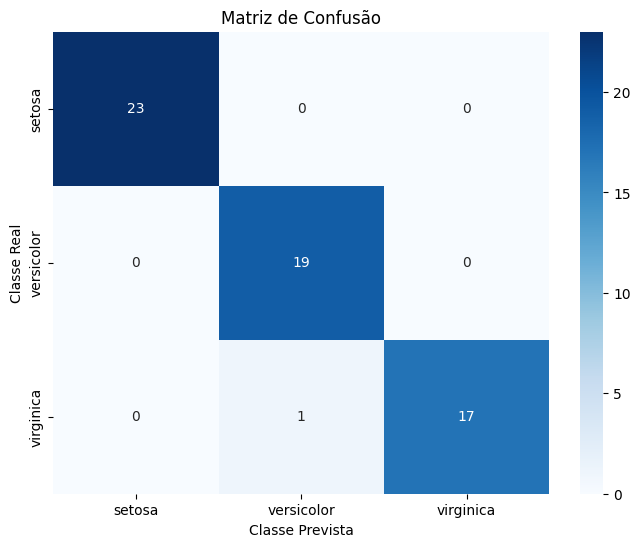

Número de amostras de treinamento: 90
Número de amostras de teste: 60

Precisão para setosa: 1.0
Revocação para setosa: 1.0

Precisão para versicolor: 0.95
Revocação para versicolor: 1.0

Precisão para virginica: 1.0
Revocação para virginica: 0.9444444444444444

Precisão média: 0.9841666666666666
Revocação média: 0.9833333333333333
Acurácia: 0.9833333333333333


In [ ]:
# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, cmap="Blues", fmt="d", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

# Imprimindo as métricas de avaliação
print("Número de amostras de treinamento:", len(X_treino))
print("Número de amostras de teste:", len(X_teste))
print("\nPrecisão para setosa:", precision_score(y_teste, y_pred, average=None)[0])
print("Revocação para setosa:", recall_score(y_teste, y_pred, average=None)[0])
print("\nPrecisão para versicolor:", precision_score(y_teste, y_pred, average=None)[1])
print("Revocação para versicolor:", recall_score(y_teste, y_pred, average=None)[1])
print("\nPrecisão para virginica:", precision_score(y_teste, y_pred, average=None)[2])
print("Revocação para virginica:", recall_score(y_teste, y_pred, average=None)[2])
print("\nPrecisão média:", precisao)
print("Revocação média:", revocacao)
print("Acurácia:", acuracia)

## CÓDIGO KNN ##

Esse é o código que implementamos no Trabalho Prático 1, mas reduzido, apenas para compararmos os resultados por aqui.

Número de amostras de treinamento: 90
Número de amostras de teste: 60
Taxa de reconhecimento para k = 3: 91.67%


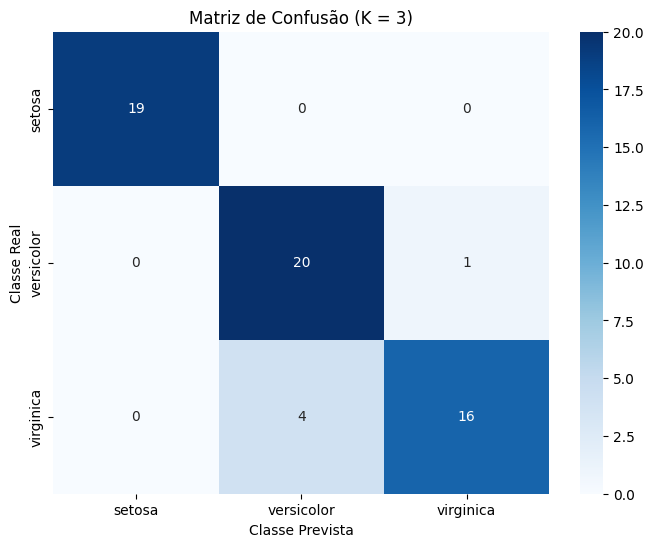


Precisão média: 0.92
Revocação média: 0.92
Acurácia média: 0.92

Tempo total de execução: 0.33 segundos


In [ ]:
# Importação do DataSet Iris
start_time_total = time.time()  # Inicia a contagem de tempo total

# Converte os dados para um DataFrame do pandas
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Adiciona uma coluna chamada 'species' usando o vetor de destino e decodificando o número da espécie
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Divisão do conjunto de dados em treinamento e teste
def dividir_dados_treino_teste(data, taxa_teste):
    # Embaralhar os dados
    np.random.shuffle(data)
    # Calcular o índice para dividir os dados
    indice_divisao = int(len(data) * taxa_teste)
    # Dividir os dados em treinamento e teste
    dados_teste = data[:indice_divisao]
    dados_treinamento = data[indice_divisao:]
    return dados_treinamento, dados_teste

# Definir a taxa de teste
taxa_teste = 0.4  # 40% dos dados serão usados para teste

# Converter o DataFrame pandas em matriz numpy para facilitar a manipulação
dados_iris = iris_df.values

# Dividir os dados em treinamento e teste
dados_treinamento, dados_teste = dividir_dados_treino_teste(dados_iris, taxa_teste)

# Verificar o tamanho dos conjuntos de treinamento e teste
print("Número de amostras de treinamento:", len(dados_treinamento))
print("Número de amostras de teste:", len(dados_teste))

# Calcula a distância euclidiana entre dois pontos
def distancia(x1, x2):
    dist = 0
    for i in range(len(x1)):
        dist += (x1[i] - x2[i])**2
    return dist **0.5

# Implementação do algoritmo KNN para classificação
def knn_classificacao(dados_treinamento, dados_teste, k):
    previsoes = []
    for amostra_teste in dados_teste:
        distancias = []
        for amostra_treinamento in dados_treinamento:
            dist = distancia(amostra_teste[:-1], amostra_treinamento[:-1])
            distancias.append((amostra_treinamento, dist))
        # Ordenar as distâncias
        distancias.sort(key=lambda x: x[1])
        # Pegar os k vizinhos mais próximos
        vizinhos = distancias[:k]
        # Contar a ocorrência de cada classe entre os vizinhos
        contagem_classes = {}
        for vizinho in vizinhos:
            classe_vizinho = vizinho[0][-1]
            if classe_vizinho in contagem_classes:
                contagem_classes[classe_vizinho] += 1
            else:
                contagem_classes[classe_vizinho] = 1
        # Classificar com base na classe mais frequente entre os vizinhos
        classe_previsao = max(contagem_classes, key=contagem_classes.get)
        previsoes.append(classe_previsao)
    return previsoes

# Função para calcular a taxa de reconhecimento
def taxa_reconhecimento(previsoes, dados_teste):
    corretos = 0
    for i in range(len(dados_teste)):
        if dados_teste[i][-1] == previsoes[i]:
            corretos += 1
    return (corretos / len(dados_teste)) * 100

# Função para calcular a matriz de confusão
def matriz_confusao(previsoes, dados_teste):
    classes_reais = [linha[-1] for linha in dados_teste]
    classes_previstas = previsoes
    classes = np.unique(classes_reais)
    matriz = np.zeros((len(classes), len(classes)))
    for i in range(len(classes_reais)):
        classe_real_index = np.where(classes == classes_reais[i])[0][0]
        classe_prevista_index = np.where(classes == classes_previstas[i])[0][0]
        matriz[classe_real_index][classe_prevista_index] += 1
    return matriz

# Função para calcular a precisão, revocação e acurácia média
def calcular_metricas_medias(matriz_confusao):
    precisao = np.diag(matriz_confusao) / np.sum(matriz_confusao, axis=0)
    revocacao = np.diag(matriz_confusao) / np.sum(matriz_confusao, axis=1)
    acuracia = (np.sum(np.diag(matriz_confusao))) / (np.sum(matriz_confusao))
    precisao_media = np.mean(precisao)
    revocacao_media = np.mean(revocacao)
    return precisao_media, revocacao_media, acuracia

# Realizar previsões com k = 3
k = 3
previsoes = knn_classificacao(dados_treinamento, dados_teste, k)
# Calcular e imprimir a taxa de reconhecimento
taxa_rec = taxa_reconhecimento(previsoes, dados_teste)
print(f'Taxa de reconhecimento para k = {k}: {taxa_rec:.2f}%')

# Calcular a matriz de confusão
matriz_conf = matriz_confusao(previsoes, dados_teste)
# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_conf, annot=True, cmap='Blues', fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title(f'Matriz de Confusão (K = {k})')
plt.show()

# Calcular e imprimir as métricas de avaliação médias
precisao_media, revocacao_media, acuracia = calcular_metricas_medias(matriz_conf)
print(f"\nPrecisão média: {precisao_media:.2f}")
print(f"Revocação média: {revocacao_media:.2f}")
print(f"Acurácia média: {acuracia:.2f}")

end_time_total = time.time()  # Termina a contagem de tempo total
total_time_total = end_time_total - start_time_total  # Calcula o tempo total de execução
print(f"\nTempo total de execução: {total_time_total:.2f} segundos")
